In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.shape

(1014, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df['RiskLevel'].replace({'high risk':'3' , 'mid risk':'2','low risk':'1'} , inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)

In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,2.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,3.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


# Defining target variable

In [8]:
df.shape

(1014, 7)

- BS -> Blood glucose levels is in terms of a molar concentration, mmol/L
- SystolicBP ->	Upper value of Blood Pressure in mmHg
- DiastolicBP -> Lower value of Blood Pressure in mmHg
- Heart Rate -> A normal resting heart rate in beats per minute.

# Basic EDA

In [14]:
X = df.drop('RiskLevel',axis = 1)
Y = df['RiskLevel']

In [15]:
X.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB


# checking for null values

In [17]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [18]:
df.duplicated().sum()

562

In [19]:
df1 = df.drop_duplicates(subset=None, keep='first')

In [20]:
df1.duplicated().sum()

0

- The data is a cleaned data as there is no null values present

### Checking correlation between features

<AxesSubplot:>

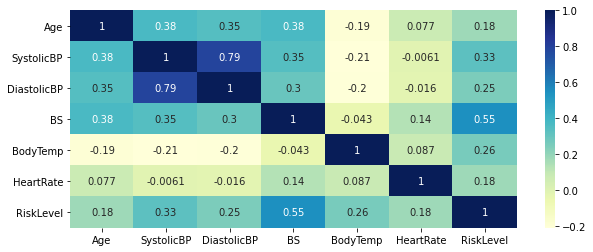

In [21]:
plt.figure(figsize=(10,4))
correlation = df1.corr()
sns.heatmap(correlation , cmap='YlGnBu',annot =True )

In [22]:
Y.nunique()

3

In [23]:
Y.value_counts()

1.0    406
2.0    336
3.0    272
Name: RiskLevel, dtype: int64

In [24]:
Y.value_counts()/Y.shape[0] *100

1.0    40.039448
2.0    33.136095
3.0    26.824458
Name: RiskLevel, dtype: float64

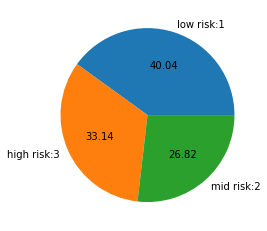

In [25]:
plt.pie(Y.value_counts() , labels = ['low risk:1','high risk:3','mid risk:2'] ,autopct ='%0.2f')
plt.show()

from the above pie chart it is clearly visible that the dataset is a balanced dataset

# Getting unique values 

In [26]:
for i in X.columns:
    print(f' {i} has {X[i].nunique()} numbers of unique values ')
    print('<= = = = = = = = = = = = = = = = = = = = = = => ')

 Age has 50 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 
 SystolicBP has 19 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 
 DiastolicBP has 16 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 
 BS has 29 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 
 BodyTemp has 8 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 
 HeartRate has 16 numbers of unique values 
<= = = = = = = = = = = = = = = = = = = = = = => 


In [27]:
def unique_value(i):
    i = i.value_counts().count()
    return i    

### Representing unique values count for each feature in a tabular format

In [28]:
X1 = pd.DataFrame(X.apply(lambda a : unique_value(a)))
X1.columns = ['features_levels']
X1

,features_levels
Age,50
SystolicBP,19
DiastolicBP,16
BS,29
BodyTemp,8
HeartRate,16


# Treating Outliers 

In [29]:
X.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [30]:
X.describe(percentiles = [0.01,0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.99])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
1%,12.000000,75.000000,49.000000,6.000000,98.000000,60.000000
5%,13.650000,85.000000,60.000000,6.100000,98.000000,60.000000
10%,15.000000,90.000000,60.000000,6.700000,98.000000,66.000000
20%,18.000000,90.000000,60.000000,6.800000,98.000000,70.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
30%,21.000000,100.000000,65.000000,6.900000,98.000000,70.000000


In [31]:
df_column = []
for i in df.columns:
    df_column.append(i)

df_column1 = df_column[:-1]
print(df_column1)

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


0 Age
1 SystolicBP
2 DiastolicBP
3 BS
4 BodyTemp
5 HeartRate


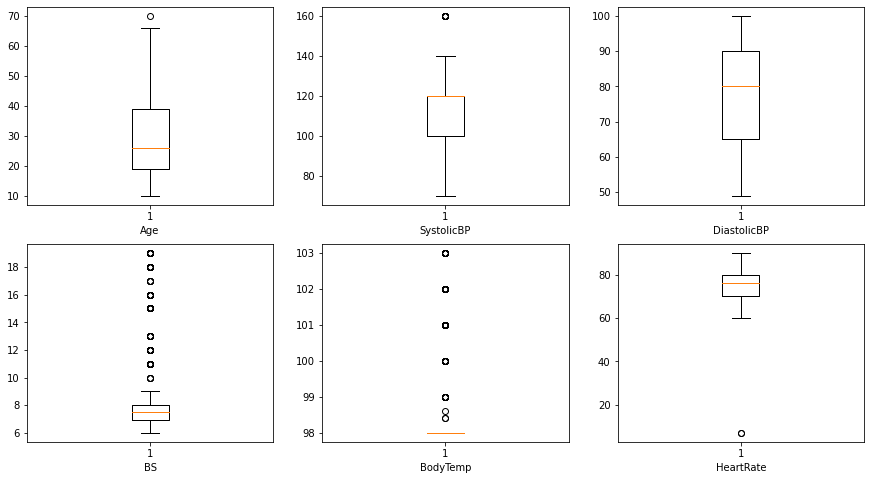

In [32]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(df_column1):
    print(i,column)
    
    plt.subplot(2, 3, i+1)
    plt.boxplot(X[column])
    
    #plt.legend()
    plt.xlabel(column)

0 Age
1 SystolicBP
2 DiastolicBP
3 BS
4 BodyTemp
5 HeartRate


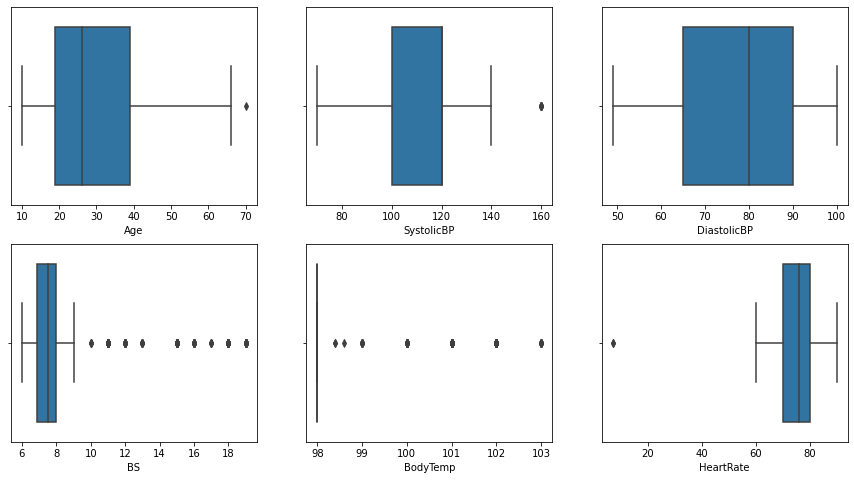

In [33]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(df_column1):
    print(i,column)
    
    plt.subplot(2, 3, i+1)
    sns.boxplot(X[column])
    
    #plt.legend()
    plt.xlabel(column)

# clipping data outside the range (1-99)%

In [34]:
def clip_data(x):
    x = x.clip(lower =x.quantile(0.01))
    x = x.clip(upper =x.quantile(0.98))
    return(x)

In [35]:
X1 = X.apply(lambda a : clip_data(a))

 - menopause occurs approx at the age of 50/51 so we are considering an upper limit of 60

In [36]:
X1.describe(percentiles = [0.01,0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.841223,113.035503,76.460552,8.725986,98.652268,74.368836
std,13.368254,17.925774,13.885796,3.293532,1.334954,7.468661
min,12.000000,75.000000,49.000000,6.000000,98.000000,60.000000
1%,12.000000,75.000000,49.000000,6.000000,98.000000,60.000000
5%,13.650000,85.000000,60.000000,6.100000,98.000000,60.000000
10%,15.000000,90.000000,60.000000,6.700000,98.000000,66.000000
20%,18.000000,90.000000,60.000000,6.800000,98.000000,70.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
30%,21.000000,100.000000,65.000000,6.900000,98.000000,70.000000


0 Age
1 SystolicBP
2 DiastolicBP
3 BS
4 BodyTemp
5 HeartRate


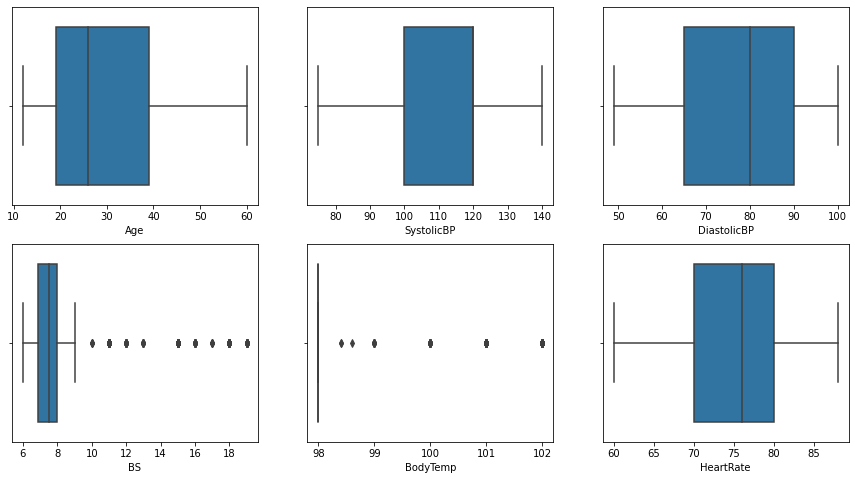

In [37]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(df_column1):
    print(i,column)
    
    plt.subplot(2, 3, i+1)
    sns.boxplot(X1[column])
    
    #plt.legend()
    plt.xlabel(column)

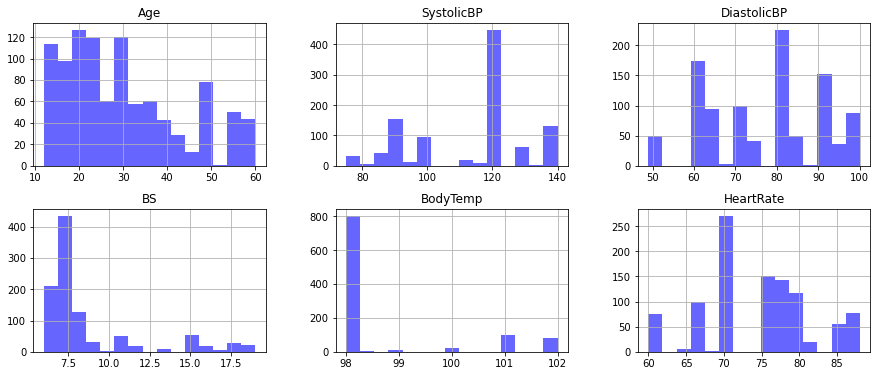

In [38]:
a = X1[X1.columns].hist(bins =15 , figsize = (15,30) , layout = (9,3) , color = 'blue', alpha = 0.6 )

# Fetures vs RiskLevel

In [39]:
df = df.apply(lambda a : clip_data(a))

In [40]:
df_column = []
for i in df.columns:
    df_column.append(i)
print(df_column)

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']


In [41]:
df["RiskLevel"]

0       3.0
1       3.0
2       3.0
3       3.0
4       1.0
       ... 
1009    3.0
1010    3.0
1011    3.0
1012    3.0
1013    2.0
Name: RiskLevel, Length: 1014, dtype: float64

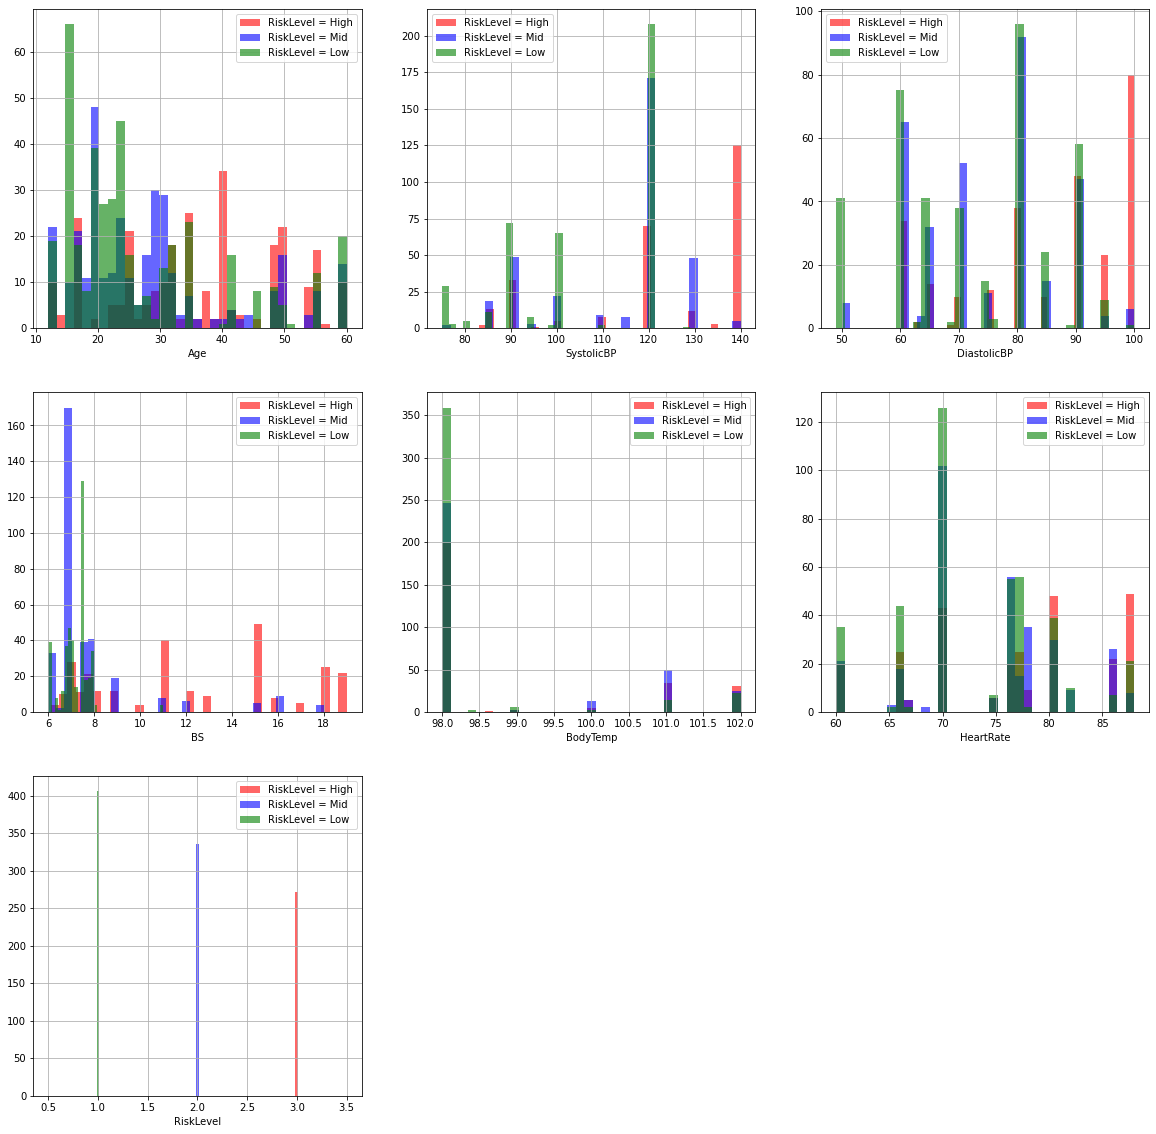

In [42]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_column, 1):
    #print(i,column)
    plt.subplot(3, 3, i)
    df[df["RiskLevel"] == 3.0][column].hist(bins=35, color='red', label='RiskLevel = High',alpha=0.6)
    df[df["RiskLevel"] == 2.0][column].hist(bins=35, color='blue', label='RiskLevel = Mid', alpha=0.6)
    df[df["RiskLevel"] == 1.0][column].hist(bins=35, color='green', label='RiskLevel = Low', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

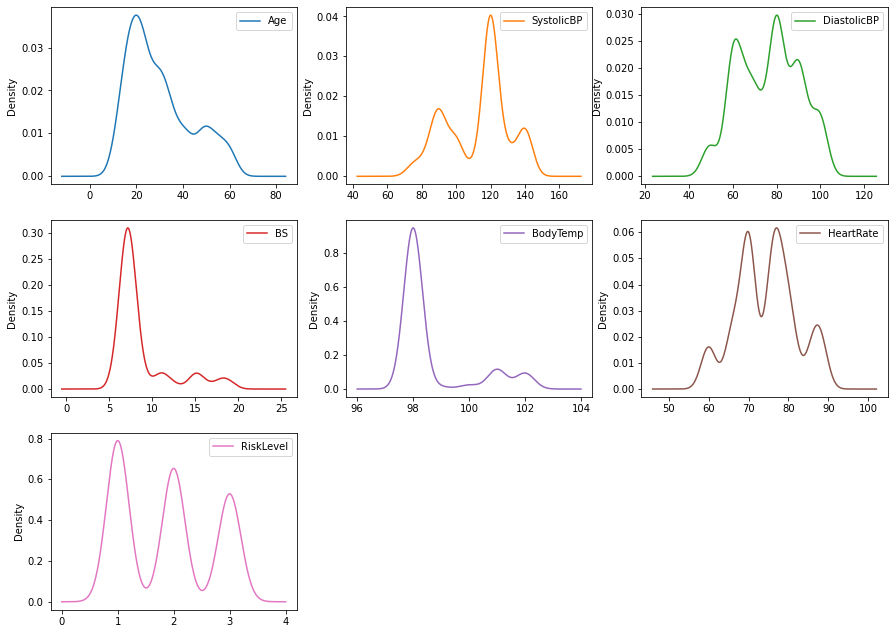

In [43]:
df.plot(kind="density", layout=(4,3), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

# Skewness

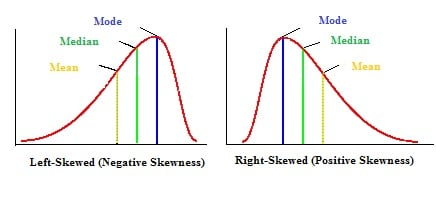

<AxesSubplot:xlabel='Age', ylabel='count'>

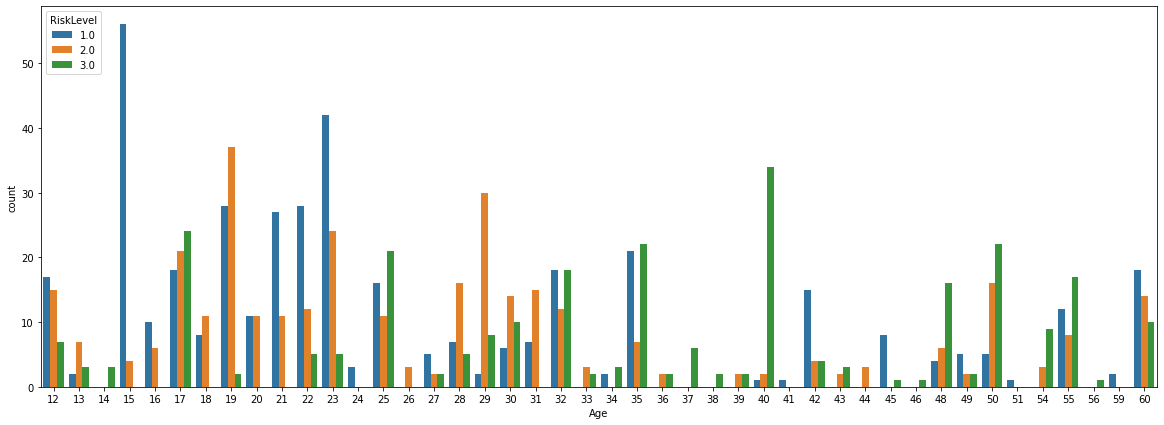

In [44]:
plt.figure(figsize = (20,7))
sns.countplot(x='Age',data = df , hue = 'RiskLevel')

<AxesSubplot:xlabel='SystolicBP', ylabel='count'>

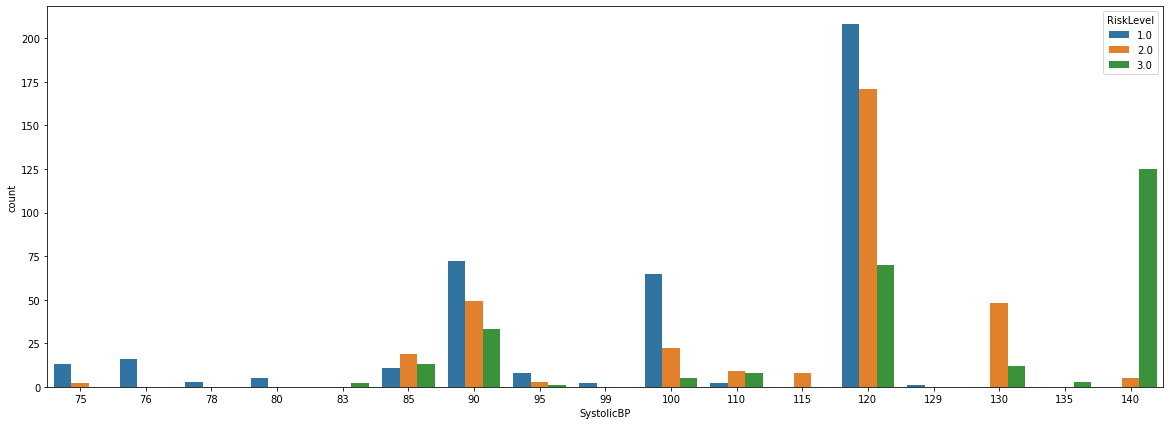

In [45]:
plt.figure(figsize = (20,7))
sns.countplot(x='SystolicBP',data = df , hue = 'RiskLevel')

<AxesSubplot:xlabel='DiastolicBP', ylabel='count'>

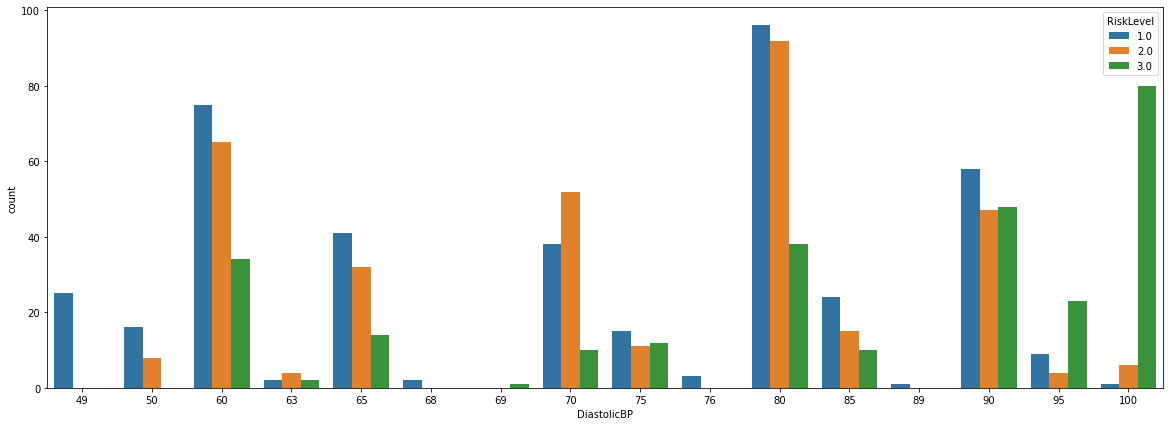

In [46]:
plt.figure(figsize = (20,7))
sns.countplot(x='DiastolicBP',data = df , hue = 'RiskLevel')

<AxesSubplot:xlabel='BS', ylabel='count'>

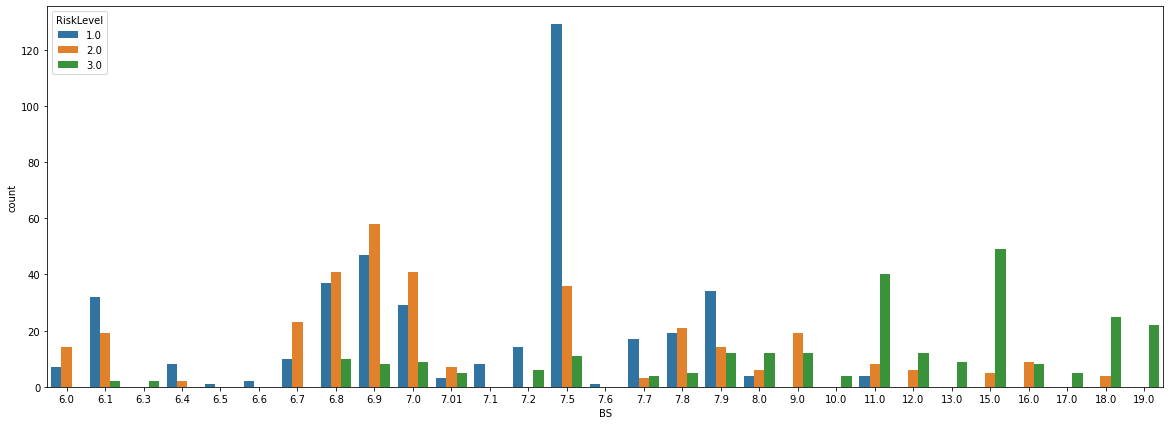

In [47]:
plt.figure(figsize = (20,7))
sns.countplot(x='BS',data = df , hue = 'RiskLevel')

<AxesSubplot:xlabel='BodyTemp', ylabel='count'>

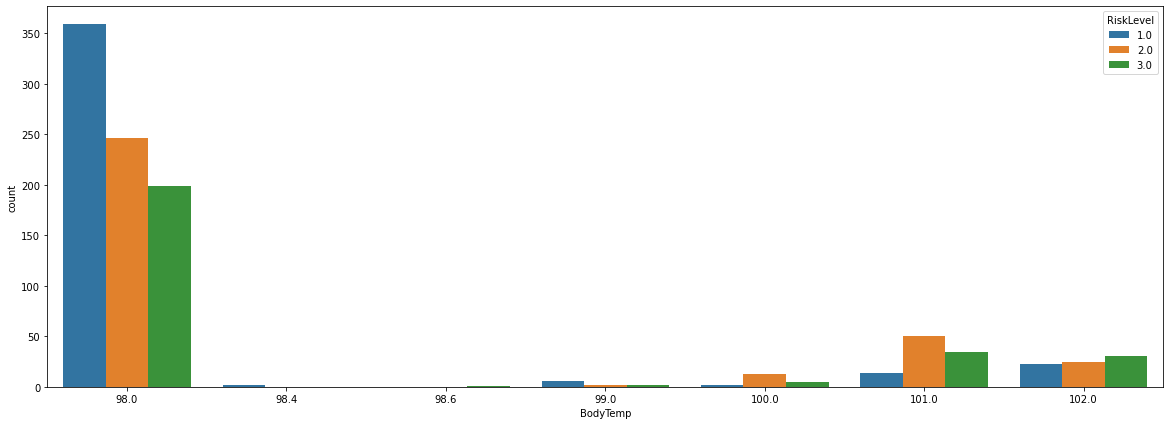

In [48]:
plt.figure(figsize = (20,7))
sns.countplot(x='BodyTemp',data = df , hue = 'RiskLevel')

<AxesSubplot:xlabel='HeartRate', ylabel='count'>

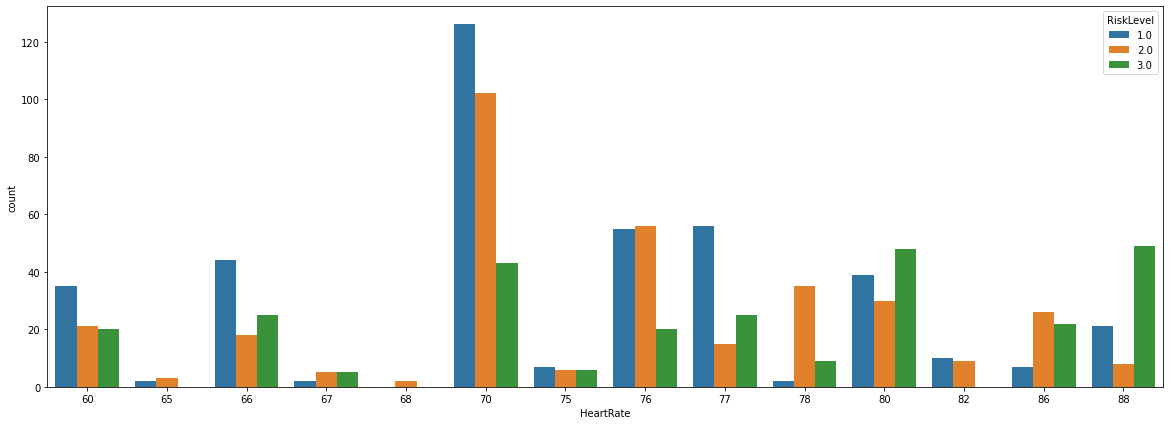

In [49]:
plt.figure(figsize = (20,7))
sns.countplot(x='HeartRate',data = df , hue = 'RiskLevel')

# Train test Split

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (811, 6)
Shape of Testing Data (203, 6)


# Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
print(X_train)

[[ 0.01586892  0.3596051   0.26018219  0.06867785  1.65272892  0.19541766]
 [-0.50789785  0.90037968 -0.46517963 -0.56360093 -0.50034961 -0.5310165 ]
 [ 0.16551657  0.3596051   0.98554401 -0.56360093 -0.50034961 -0.5310165 ]
 ...
 [-0.95684079 -1.26271865 -0.97293291 -0.56360093  1.65272892 -0.5310165 ]
 [ 2.63470278  0.90037968  0.26018219  1.87518866 -0.50034961  1.40614125]
 [ 1.36269776  1.44115426  0.98554401  1.87518866 -0.50034961  1.89043069]]


In [54]:
print(X_test)

[[-0.0589549   0.90037968 -0.46517963 -0.32273282 -0.50034961  0.43756238]
 [ 0.01586892  1.44115426  1.71090582  1.87518866 -0.50034961 -0.5310165 ]
 [ 1.51234541  1.44115426  1.34822491  2.47735893 -0.50034961 -1.7417401 ]
 ...
 [ 2.26058366 -1.26271865 -0.82786054 -0.59370944 -0.50034961  0.31649002]
 [-0.65754549 -1.26271865 -1.19054145 -0.56360093 -0.50034961  1.40614125]
 [-0.3582502   1.44115426  1.71090582 -0.53048156 -0.50034961  0.67970709]]


# Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
# instantiate the model (using the default parameters)
LR = LogisticRegression(random_state = 10)
# fit the model with data
LR.fit(X_train,Y_train)

LogisticRegression(random_state=10)

In [57]:
Y_pred = LR.predict(X_test)
Y_pred

array([2., 3., 3., 1., 3., 3., 1., 3., 2., 2., 3., 1., 1., 2., 2., 1., 3.,
       1., 1., 2., 1., 3., 1., 3., 1., 2., 3., 1., 1., 1., 2., 3., 1., 1.,
       1., 3., 3., 1., 1., 3., 3., 3., 3., 2., 1., 1., 3., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 1.,
       1., 2., 2., 3., 2., 2., 2., 3., 1., 3., 3., 2., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 1., 3., 3., 1., 3., 1., 1., 1., 1., 3., 1., 1., 3.,
       2., 1., 1., 1., 1., 3., 1., 2., 2., 2., 1., 3., 3., 1., 1., 3., 1.,
       3., 3., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       3., 1., 1., 2., 3., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       2., 3., 2., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 3., 1., 1., 1.,
       3., 1., 1., 1., 1., 3., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1., 3.,
       1., 1., 2., 2., 1., 3., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3.])

# Performance & Accuracy

In [58]:
cm = metrics.confusion_matrix(Y_test,Y_pred)
cm

array([[71,  5,  4],
       [42, 21, 13],
       [ 2,  5, 40]], dtype=int64)

<AxesSubplot:>

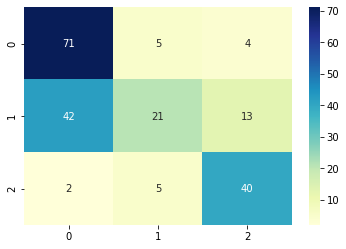

In [59]:
sns.heatmap(cm,annot =True,cmap='YlGnBu')

In [60]:
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6502463054187192


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier 

In [62]:
rf = RandomForestClassifier(random_state=42)

# Finding best parameters using GridSearch CV

In [ ]:
# np.random.seed(42)


# param_dist = {'max_depth': [2, 3, 4, 5, 6,8,10,12,14,15],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'criterion': ['gini', 'entropy'],
#              }

# rf_clf = GridSearchCV(rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 2)

# rf_clf.fit(X_train, Y_train)
# print('Best Parameters using grid search: \n', rf_clf.best_params_)

In [73]:
rf.set_params(n_estimators = 18,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 14,
                  bootstrap = False)

RandomForestClassifier(bootstrap=False, max_depth=14, n_estimators=18,
                       random_state=42)

# Training the model

In [74]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=14, n_estimators=18,
                       random_state=42)

In [75]:
## Training and Testing score 

score_train = rf.score(X_train, Y_train)
print(f" Training Score: {score_train}")
print()
score_test = rf.score(X_test, Y_test)
print(f" Testing Score: {score_test}")

 Training Score: 0.935881627620222

 Testing Score: 0.8275862068965517


In [76]:
#Predicting the Attrition for X_test
y_pred = rf.predict(X_test)
y_pred

array([2., 3., 3., 1., 1., 2., 2., 2., 2., 1., 3., 2., 2., 3., 2., 2., 3.,
       1., 1., 2., 2., 2., 3., 3., 1., 2., 3., 1., 1., 1., 2., 3., 1., 2.,
       1., 3., 3., 2., 1., 3., 3., 1., 3., 3., 1., 2., 3., 2., 1., 1., 2.,
       1., 1., 2., 2., 2., 3., 1., 1., 2., 1., 2., 2., 1., 1., 3., 2., 3.,
       2., 3., 3., 3., 3., 2., 2., 3., 1., 2., 3., 2., 1., 2., 1., 1., 2.,
       1., 1., 2., 3., 2., 2., 3., 1., 3., 2., 1., 2., 1., 3., 2., 1., 2.,
       1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 3., 2., 1., 1., 3., 2.,
       3., 2., 1., 1., 2., 3., 3., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1.,
       3., 2., 1., 2., 3., 2., 3., 3., 1., 1., 3., 1., 1., 2., 1., 2., 1.,
       2., 3., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
       3., 1., 2., 1., 2., 3., 2., 1., 1., 1., 3., 2., 1., 2., 3., 1., 3.,
       1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 3., 1., 2., 2., 2., 3.])

In [77]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8275862068965517


# Decision tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', random_state=20,max_depth=14,min_samples_split=140)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=140, random_state=20)

In [83]:
y_pred_tree=DTC.predict(X_test)

In [84]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred_tree))

Accuracy: 0.6847290640394089


# k-Nearest Neighbors

### Training the K-NN model on the Training set¶

In [137]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 15, p = 3)
KNC.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=15, p=3)

In [138]:
y_pred_KNC = KNC.predict(X_test)

In [139]:
y_pred_KNC.shape

(203,)

In [140]:
Y_test.shape

(203,)

In [141]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred_KNC))

Accuracy: 0.7192118226600985


# Training the SVM model on the Training set

In [142]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 20)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=20)

In [143]:
y_pred_svm = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred_svm),1), Y_test.reshape(len(Y_test),1)),1))

In [144]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred_svm))

Accuracy: 0.6551724137931034


# XG-BOOST

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
clf = GradientBoostingClassifier(n_estimators=18, learning_rate=1.0,max_depth=4, random_state=20)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8325123152709359

In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred_xgb = classifier.predict(X_test)


print('Accuracy:',metrics.accuracy_score(Y_test, y_pred_xgb))
#print('recall:',metrics.recall_score(Y_test, y_pred_xgb))
#print('precision:',metrics.precision_score(Y_test, y_pred_xgb))
#print('f-score:',metrics.f1_score(Y_test, y_pred_xgb))

Accuracy: 0.6551724137931034


# Naive Bayes

In [164]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
GNB = GaussianNB()
BNB = BernoulliNB()
MNB = MultinomialNB()

#MNB.fit(X_train, Y_train)

BernoulliNB()

In [165]:
GNB.fit(X_train, Y_train)

GaussianNB()

In [167]:
y_pred_GNB = GNB.predict(X_test)

In [169]:
print(f'Model Accuracy : { metrics.accuracy_score(y_pred_GNB,Y_test)}')

Model Accuracy : 0.5763546798029556


In [170]:
BNB.fit(X_train, Y_train)

BernoulliNB()

In [171]:
y_pred_BNB = BNB.predict(X_test)

In [172]:
print(f'Model Accuracy : { metrics.accuracy_score(y_pred_BNB,Y_test)}')

Model Accuracy : 0.5320197044334976
